## Binary classification: imdb reviews

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [7]:
word_index = imdb.get_word_index()
reverse_word_index = {val: k for k, val in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(x-3, '?') for x in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train.shape

(25000, 10000)

In [11]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)
y_train.shape

(25000,)

In [13]:
from tensorflow import keras 
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Crossentropy is a quantity from information theory that measures the distance between probability distributions: in this case, between the ground truth labels distribution and the predictions distribution

In [14]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6842 - loss: 0.6194 - val_accuracy: 0.8611 - val_loss: 0.4210
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8817 - loss: 0.3698 - val_accuracy: 0.8834 - val_loss: 0.3236
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9190 - loss: 0.2646 - val_accuracy: 0.8860 - val_loss: 0.2905
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9333 - loss: 0.2072 - val_accuracy: 0.8811 - val_loss: 0.2946
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9424 - loss: 0.1766 - val_accuracy: 0.8866 - val_loss: 0.2821
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9575 - loss: 0.1456 - val_accuracy: 0.8724 - val_loss: 0.3322
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9582 - loss: 0.1323 - val_accuracy: 0.8861 - val_loss: 0.2935
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9674 - loss: 0.1099 - val_accuracy: 0.8853 - val_los

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

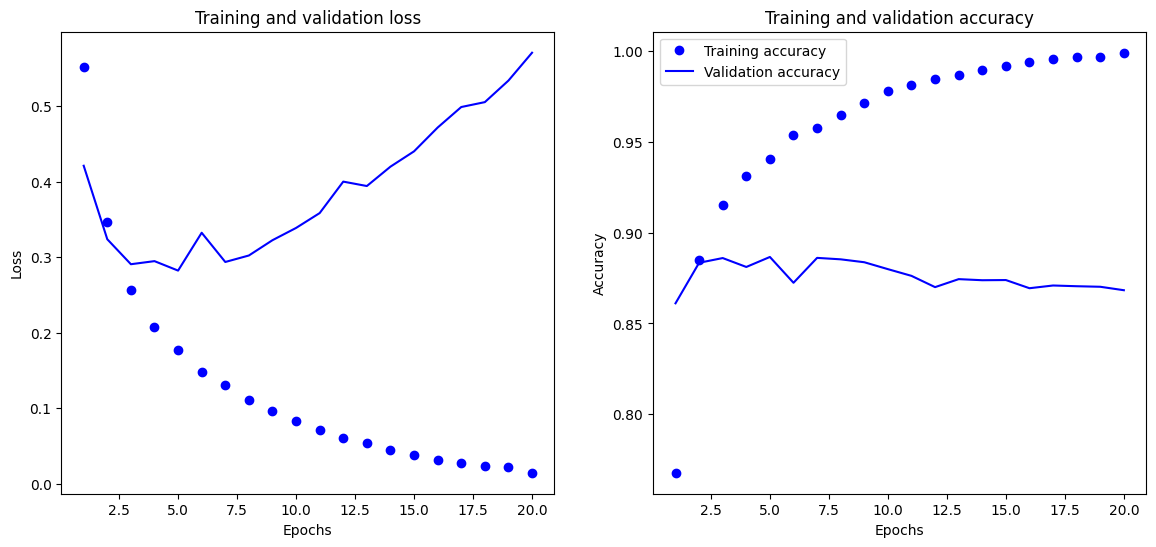

In [32]:
import matplotlib.pyplot as plt 
def plot_history(history):
    history_dict = history.history
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)
    axs[0].plot(epochs, loss_values, 'bo', label="Training loss")
    axs[0].plot(epochs, val_loss_values, 'b', label="Validation loss")
    axs[0].set_title("Training and validation loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")

    axs[1].plot(epochs, history_dict['accuracy'], 'bo', label="Training accuracy")
    axs[1].plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
    axs[1].set_ylabel("Accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_title("Training and validation accuracy")
    plt.legend()
    plt.show()
plot_history(history)

## Multiclass classification: classifying newswires

In [22]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print("Size of training set, test set: ", len(train_data), ', ', len(test_data))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Size of training set, test set:  8982 ,  2246


In [25]:
word_index = reuters.get_word_index()
reverse_word_index = {val: k for k, val in word_index.items()}
decoded_newswire = " ".join([reverse_word_index.get(x-3, '?') for x in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [28]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [29]:
from tensorflow.keras.utils import to_categorical  # one hot encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(f"train_labels[0]: {train_labels[0]}, y_train[0]: {y_train[0]}")

train_labels[0]: 3, y_train[0]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [31]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3749 - loss: 3.2620 - val_accuracy: 0.6150 - val_loss: 1.8249
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6557 - loss: 1.6423 - val_accuracy: 0.6830 - val_loss: 1.3663
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7352 - loss: 1.1861 - val_accuracy: 0.7320 - val_loss: 1.1798
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7891 - loss: 0.9916 - val_accuracy: 0.7680 - val_loss: 1.0782
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8229 - loss: 0.8053 - val_accuracy: 0.7810 - val_loss: 1.0032
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8526 - loss: 0.6790 - val_accuracy: 0.7960 - val_loss: 0.9499
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8858 - loss: 0.5501 - val_accuracy: 0.7970 - val_loss: 0.9333
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8999 - loss: 0.4762 - val_accuracy: 0.8050 - v

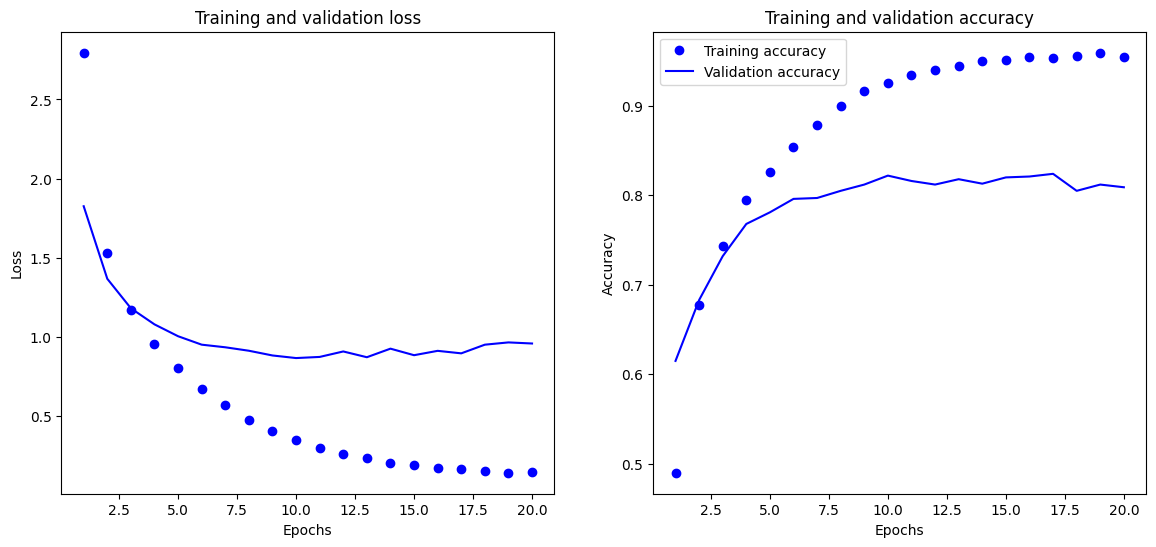

In [33]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))
plot_history(history)

In [39]:
values, counts = np.unique(train_labels, return_counts=True)
print("Random classifier would obtain: ", max(counts) / sum(counts))

Random classifier would obtain:  0.3517034068136273


<Axes: ylabel='Count'>

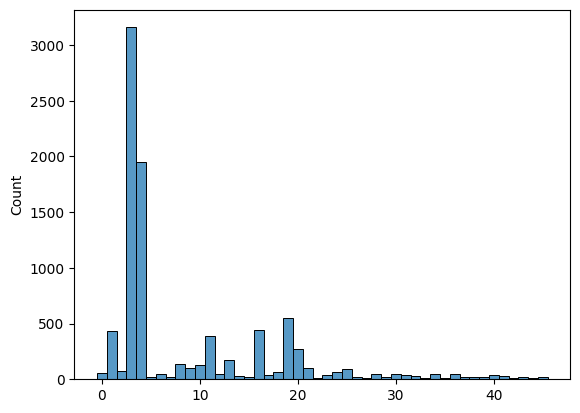

In [45]:
import pandas as pd
import seaborn as sns
test_df = pd.Series(train_labels).astype("category")
sns.histplot(test_df)

## Regression: the Boston housing price dataset

In [46]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print("Size of training set, test set: ", len(train_data), ', ', len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
Size of training set, test set:  404 ,  102


In [47]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])